# Imports

In [60]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 2.9 MB/s eta 0:00:00 0:00:01


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


# Loading Data JSON and CSV

In [86]:
df_csv = pd.read_csv("../svarah/meta_speaker_stats.csv")


In [87]:
import json

# Load manifest files
def load_manifest(file_path):
    with open(file_path, 'r') as file:
        data = [json.loads(line.strip()) for line in file]
    return pd.DataFrame(data)

# Load manifest files into DataFrames
df_svarah_manifest = load_manifest('../svarah/svarah_manifest.json')
df_saa_l1_manifest = load_manifest('../svarah/saa_l1_manifest.json')

In [88]:
df_svarah_manifest

,audio_filepath,duration,text
0,audio/281474976884635_f3269_chunk_0.wav,8.759500,Our district Hasana was the land of the great ...
1,audio/281474976885801_f2235_chunk_24.wav,3.100062,There is a gradual shift in the mentality
2,audio/281474976925705_f2479_chunk_0.wav,0.450062,Wow
3,audio/281474976901104_f2909_chunk_0.wav,2.721125,Nipah virus belongs to the
4,audio/281474976888137_f2862_chunk_0.wav,3.694313,How much money is left in my Arunachal Pradesh...
...,...,...,...
6651,audio/281474976894318_f1066_chunk_0.wav,0.405438,Five
6652,audio/281474976901670_f1976_chunk_3.wav,4.916313,"Instead, it is the way the climatic condition"
6653,audio/281474976925497_f3223_chunk_0.wav,3.620000,Dance can be used as a vehicle of expressions.
6654,audio/281474976884627_f3339_chunk_1.wav,4.540125,and every day I deposit our kitchen waste and ...


In [89]:
df_saa_l1_manifest

,audio_filepath,duration,text
0,/data/tahir/indic-whisper-evals/speech-archive...,0.332554,Please call Stella. Ask her to bring these th...
1,/data/tahir/indic-whisper-evals/speech-archive...,0.379978,Please call Stella. Ask her to bring these th...
2,/data/tahir/indic-whisper-evals/speech-archive...,0.380753,Please call Stella. Ask her to bring these th...
3,/data/tahir/indic-whisper-evals/speech-archive...,0.312060,Please call Stella. Ask her to bring these th...
4,/data/tahir/indic-whisper-evals/speech-archive...,0.320246,Please call Stella. Ask her to bring these th...
...,...,...,...
574,/data/tahir/indic-whisper-evals/speech-archive...,0.438857,Please call Stella. Ask her to bring these th...
575,/data/tahir/indic-whisper-evals/speech-archive...,0.353217,Please call Stella. Ask her to bring these th...
576,/data/tahir/indic-whisper-evals/speech-archive...,0.395436,Please call Stella. Ask her to bring these th...
577,/data/tahir/indic-whisper-evals/speech-archive...,0.384339,Please call Stella. Ask her to bring these th...


# Data Overview

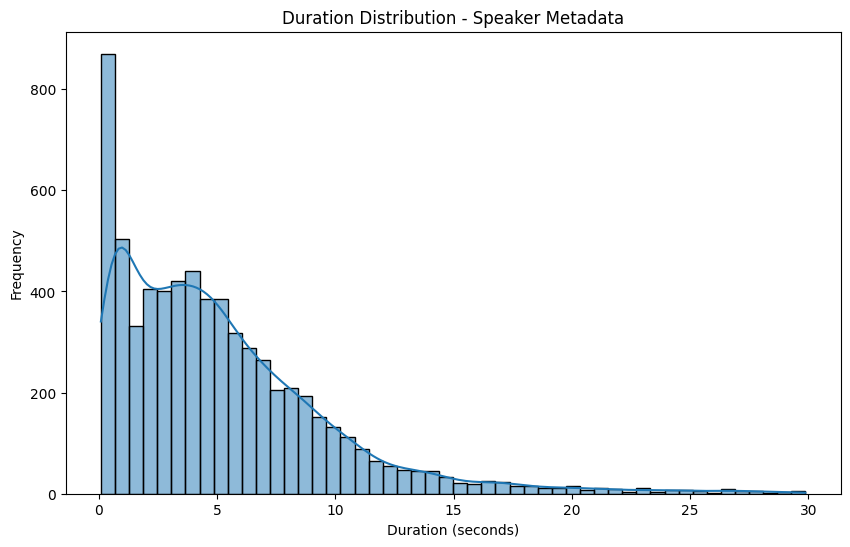

In [102]:
#Duration Distribution - Speaker Metadata
plt.figure(figsize=(10, 6))
sns.histplot(df_csv['duration'], bins=50, kde=True)
plt.title('Duration Distribution - Speaker Metadata')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

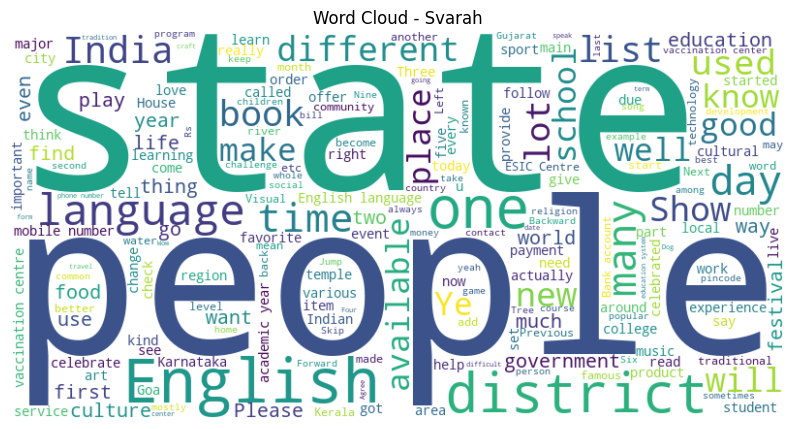

In [128]:
#Word Cloud - Main CSV
text = ' '.join(df_csv['text'].dropna().values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Svarah')
plt.axis('off')
plt.show()

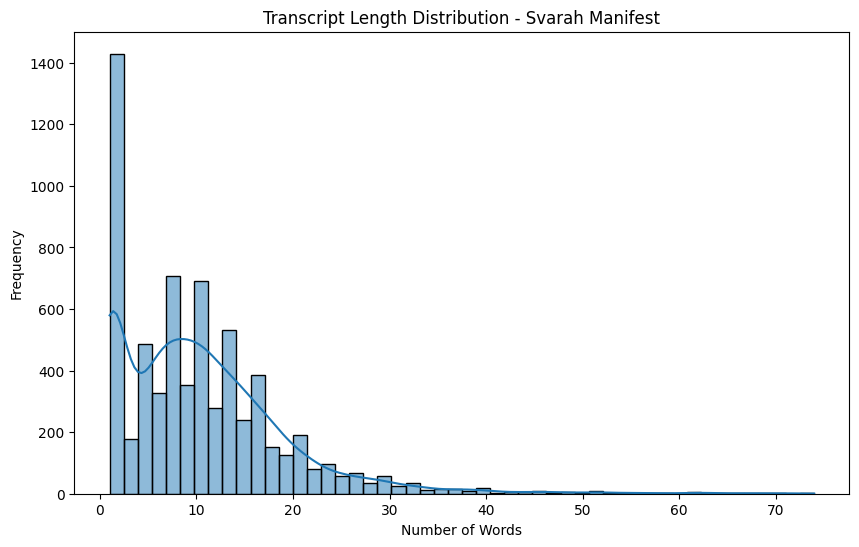

In [104]:
#Transcript Length Distribution - Svarah Manifest
plt.figure(figsize=(10, 6))
sns.histplot(df_svarah_manifest['word_count'], bins=50, kde=True)
plt.title('Transcript Length Distribution - Svarah Manifest')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

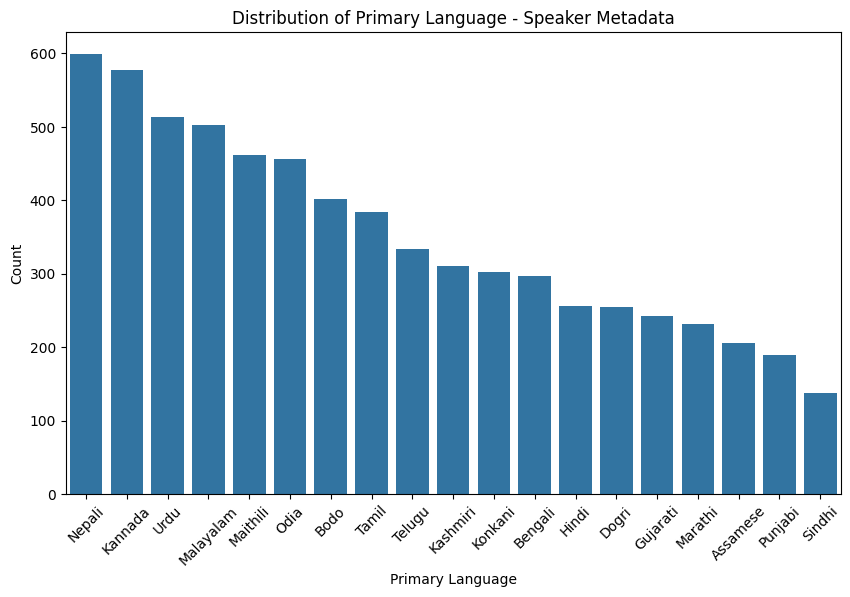

In [112]:
# Calculate the frequency of each primary language and sort them in descending order
sorted_primary_language = df_csv['primary_language'].value_counts().sort_values(ascending=False)

# Plot the distribution with the sorted order
plt.figure(figsize=(10, 6))
sns.countplot(x='primary_language', data=df_csv, order=sorted_primary_language.index)
plt.title('Distribution of Primary Language - Speaker Metadata')
plt.xlabel('Primary Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

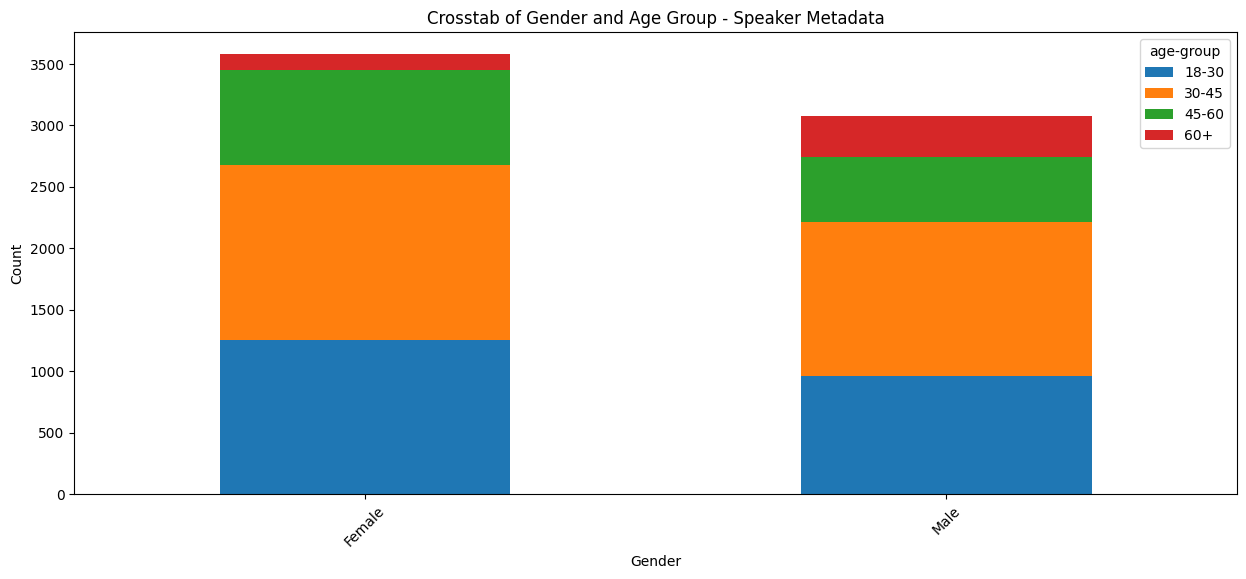

In [107]:
#Cross-tabulation - Gender vs. Age Group
crosstab_gender_age = pd.crosstab(df_csv['gender'], df_csv['age-group'])
crosstab_gender_age.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Crosstab of Gender and Age Group - Speaker Metadata')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

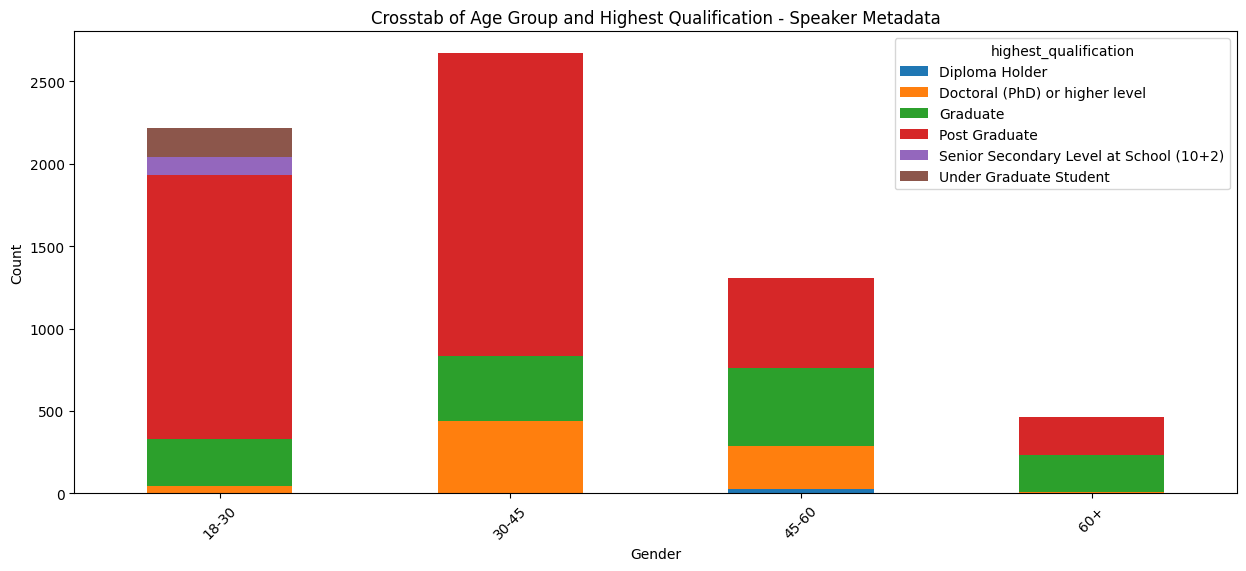

In [116]:
#Cross-tabulation -  Age Group vs. Highest Qualification
crosstab_gender_age = pd.crosstab(df_csv['age-group'], df_csv['highest_qualification'])
crosstab_gender_age.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Crosstab of Age Group and Highest Qualification - Speaker Metadata')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

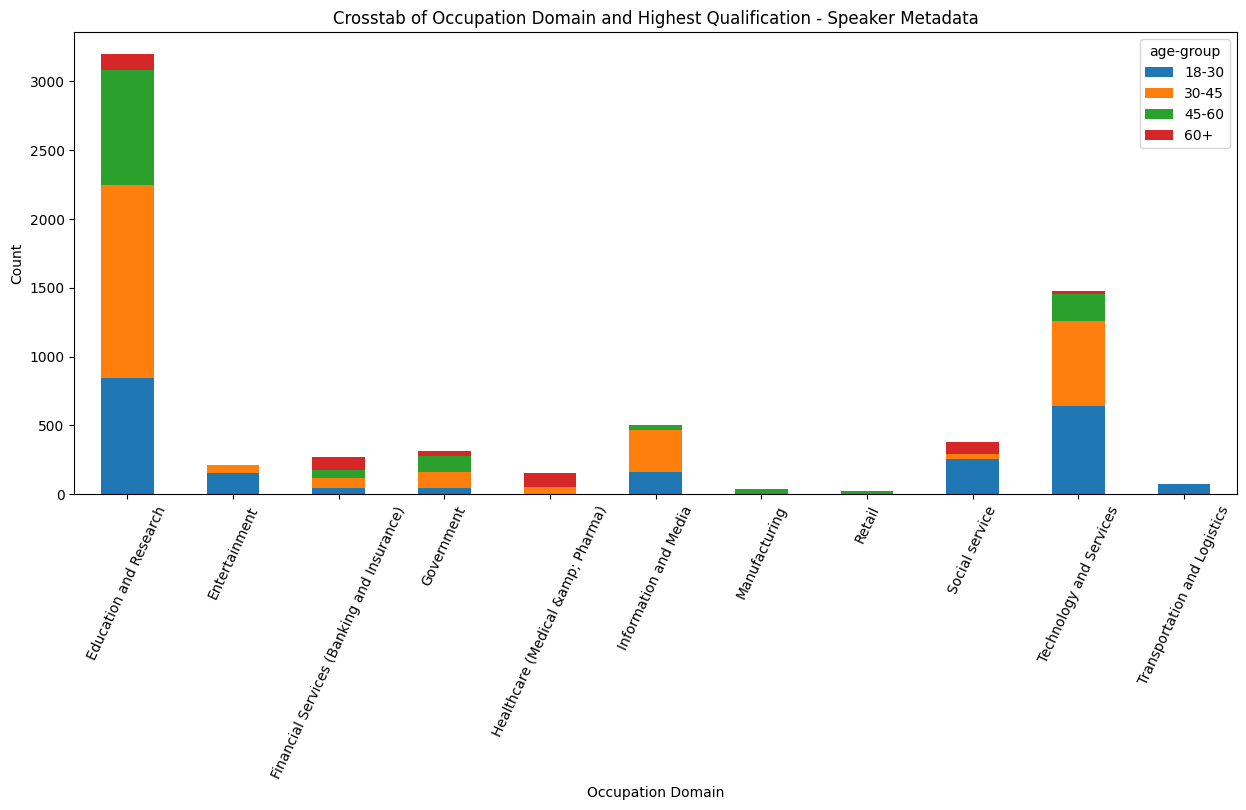

In [127]:
#Cross-tabulation - Occupation Domain vs. Highest Qualification
crosstab_occupation_qualification = pd.crosstab(df_csv['occupation_domain'], df_csv['age-group'])
crosstab_occupation_qualification.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Crosstab of Occupation Domain and Highest Qualification - Speaker Metadata')
plt.xlabel('Occupation Domain')
plt.ylabel('Count')
plt.xticks(rotation=65)
plt.show()

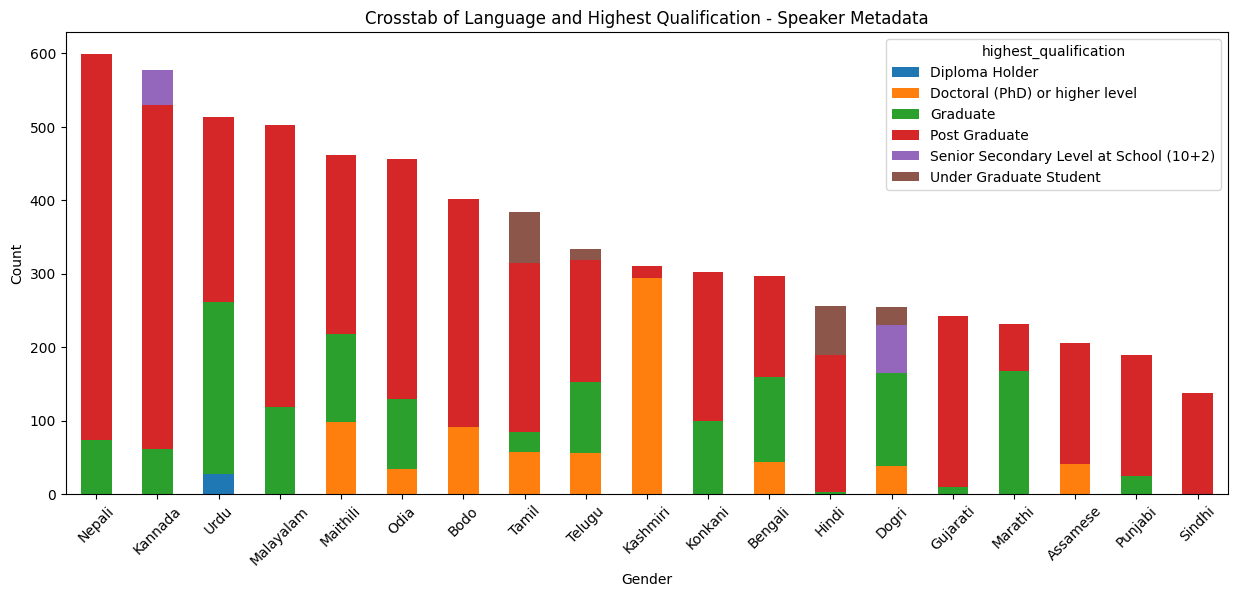

In [126]:
#Cross-tabulation -    Highest Qualification vs. Primary Language 
crosstab_gender_age = pd.crosstab( df_csv['primary_language'], df_csv['highest_qualification'])

crosstab_language_qualification = crosstab_gender_age.loc[crosstab_gender_age.sum(axis=1).sort_values(ascending=False).index]

crosstab_language_qualification.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Crosstab of Language and Highest Qualification - Speaker Metadata')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

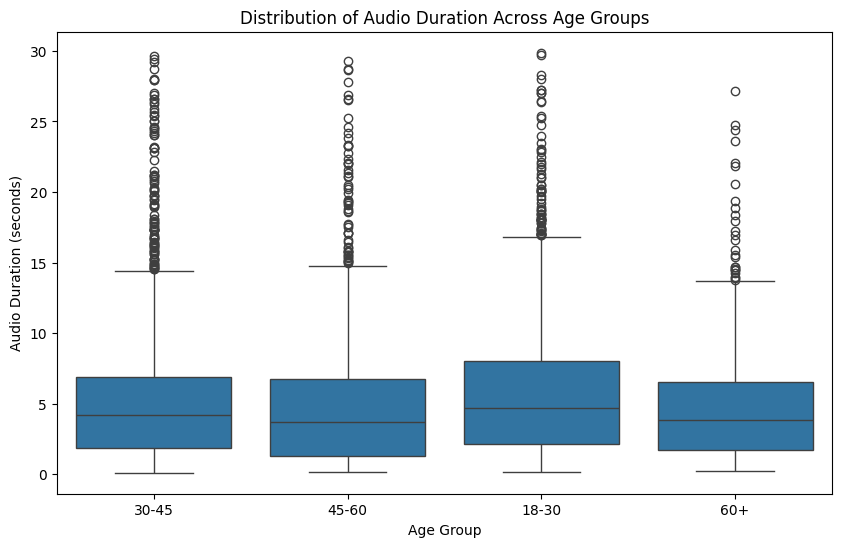

In [129]:
#Distribution of Audio Duration Across Age Groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='age-group', y='duration', data=df_csv)
plt.title('Distribution of Audio Duration Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Audio Duration (seconds)')
plt.show()

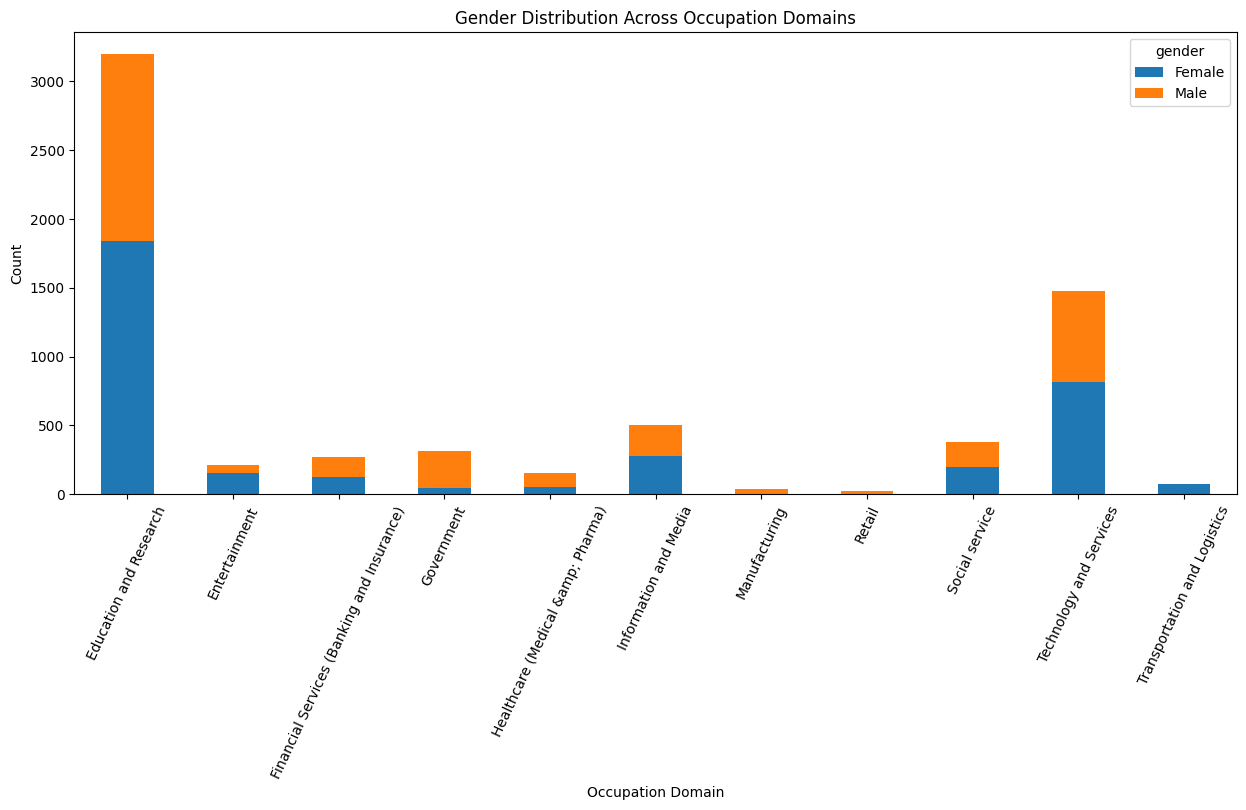

In [130]:
#Gender Distribution Across Occupation Domains
crosstab_gender_occupation = pd.crosstab(df_csv['occupation_domain'], df_csv['gender'])
crosstab_gender_occupation.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Gender Distribution Across Occupation Domains')
plt.xlabel('Occupation Domain')
plt.ylabel('Count')
plt.xticks(rotation=65)
plt.show()

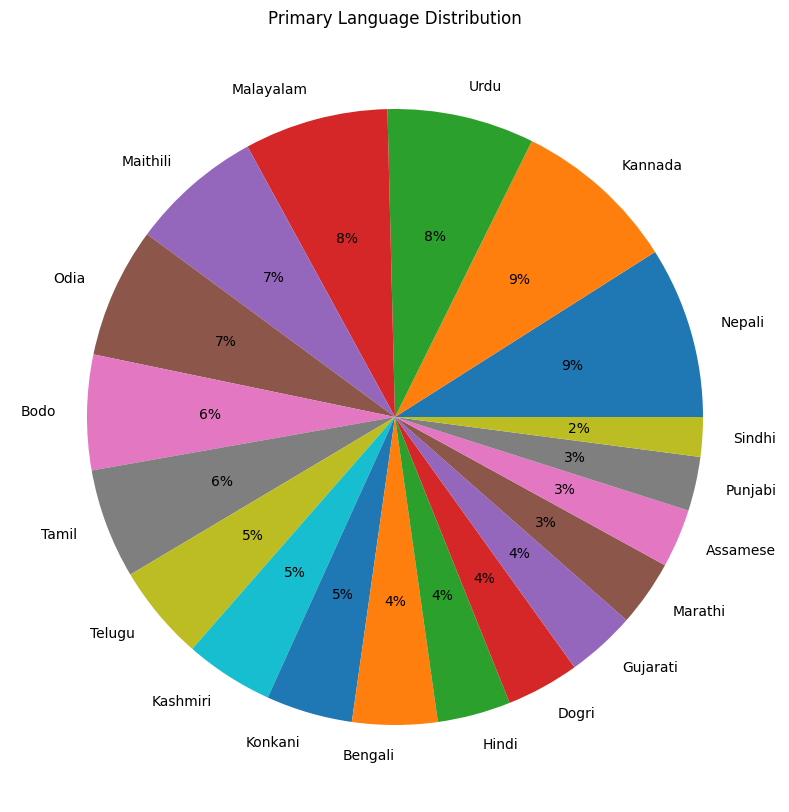

In [138]:
#Primary Language Distribution
plt.figure(figsize=(15, 10))
df_csv['primary_language'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Primary Language Distribution')
plt.ylabel('')
plt.show()

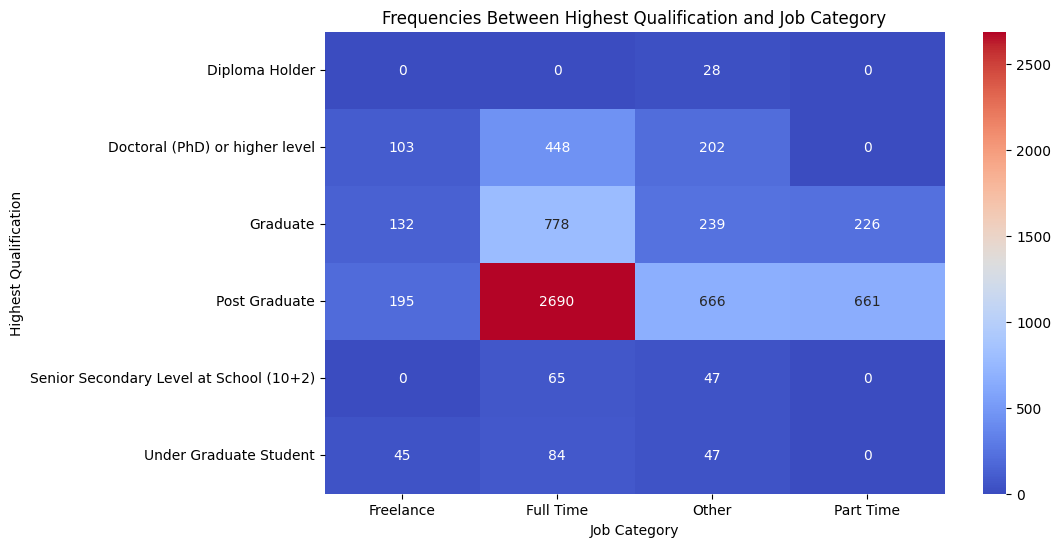

In [147]:
#Correlation Between Highest Qualification and Job Category
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

# Crosstab of highest qualification and job category
crosstab_qualification_job = pd.crosstab(df_csv['highest_qualification'], df_csv['job_category'])

# Calculate Cramer's V
cramers_v_value = cramers_v(crosstab_qualification_job)

# Plot the heatmap for the contingency table (frequencies)
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_qualification_job, annot=True, cmap='coolwarm', fmt='d')
plt.title(f'Frequencies Between Highest Qualification and Job Category')
plt.xlabel('Job Category')
plt.ylabel('Highest Qualification')
plt.show()

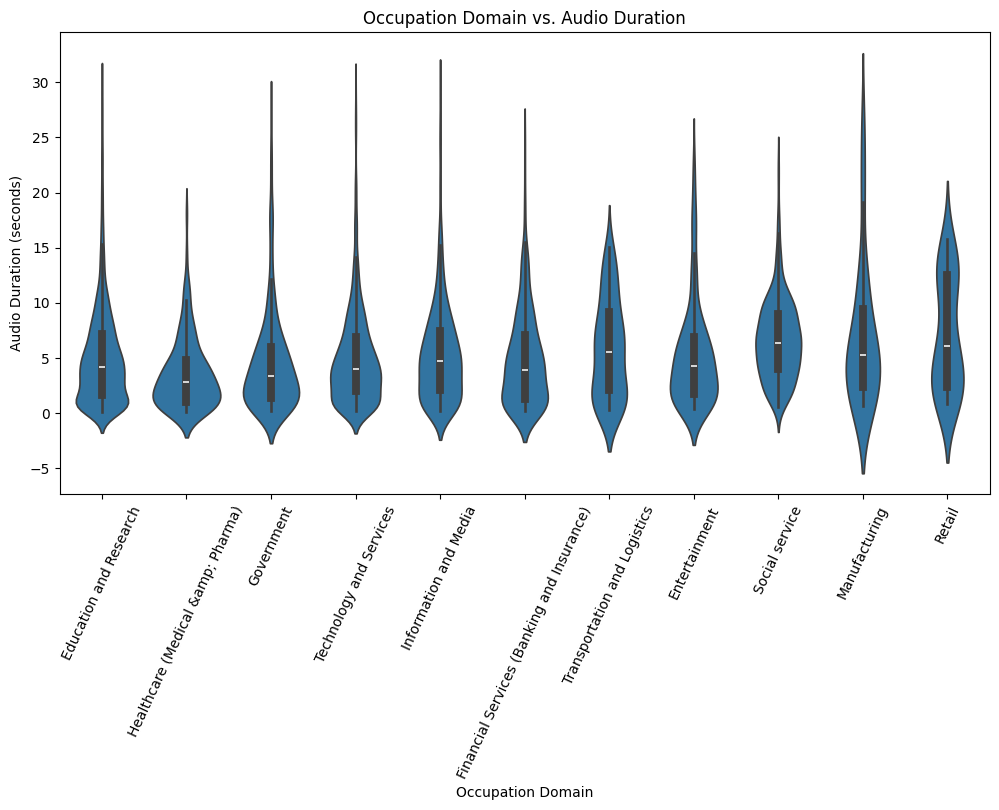

In [140]:
#Occupation Domain vs. Audio Duration
plt.figure(figsize=(12, 6))
sns.violinplot(x='occupation_domain', y='duration', data=df_csv)
plt.title('Occupation Domain vs. Audio Duration')
plt.xlabel('Occupation Domain')
plt.ylabel('Audio Duration (seconds)')
plt.xticks(rotation=65)
plt.show()

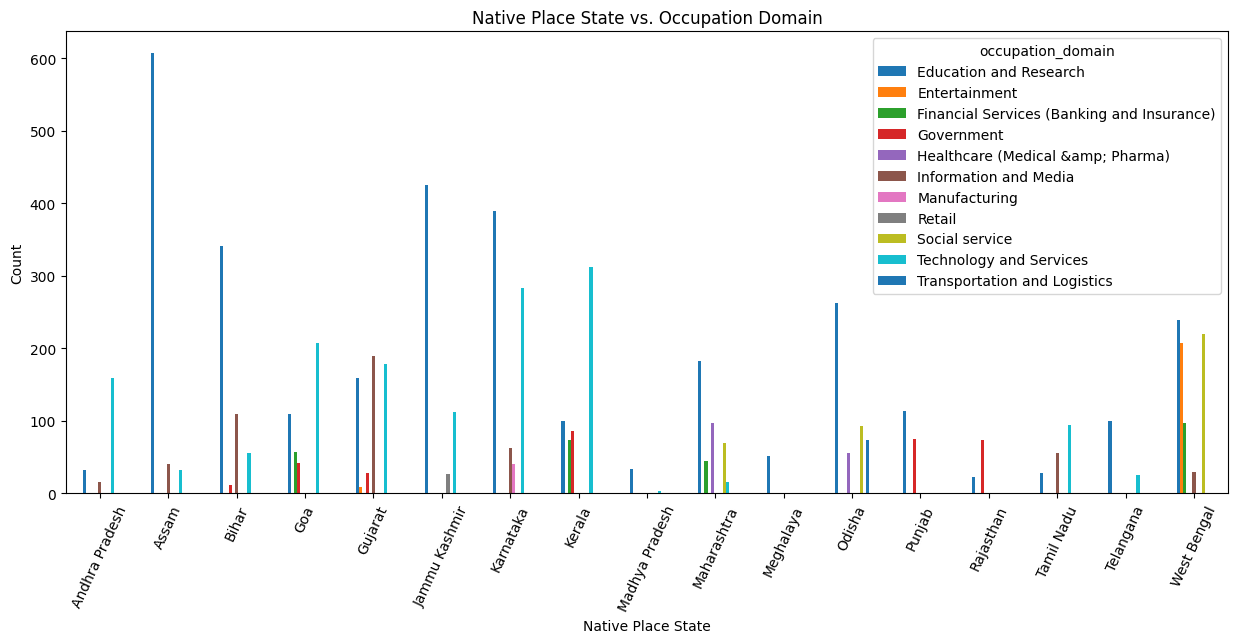

In [141]:
#Native Place State vs. Occupation Domain
crosstab_state_occupation = pd.crosstab(df_csv['native_place_state'], df_csv['occupation_domain'])
crosstab_state_occupation.plot(kind='bar', figsize=(15, 6))
plt.title('Native Place State vs. Occupation Domain')
plt.xlabel('Native Place State')
plt.ylabel('Count')
plt.xticks(rotation=65)
plt.show()

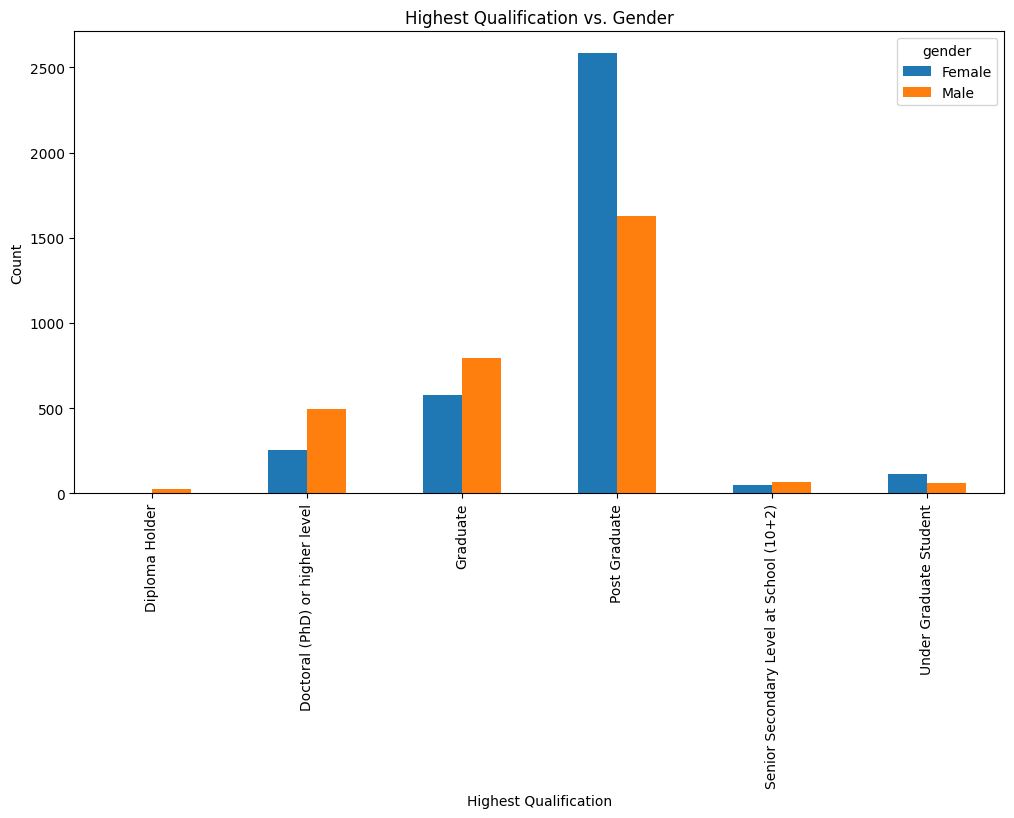

In [142]:
# Highest Qualification vs. Gender
crosstab_qualification_gender = pd.crosstab(df_csv['highest_qualification'], df_csv['gender'])
crosstab_qualification_gender.plot(kind='bar', figsize=(12, 6))
plt.title('Highest Qualification vs. Gender')
plt.xlabel('Highest Qualification')
plt.ylabel('Count')
plt.show()

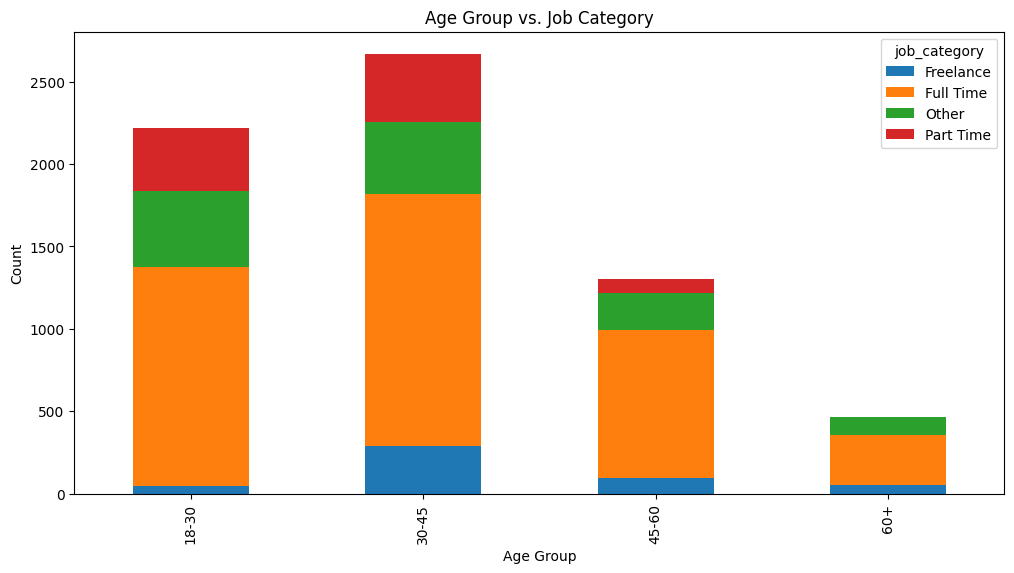

In [143]:
# AgeGroup vs Job Category 
crosstab_age_job = pd.crosstab(df_csv['age-group'], df_csv['job_category'])
crosstab_age_job.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Age Group vs. Job Category')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

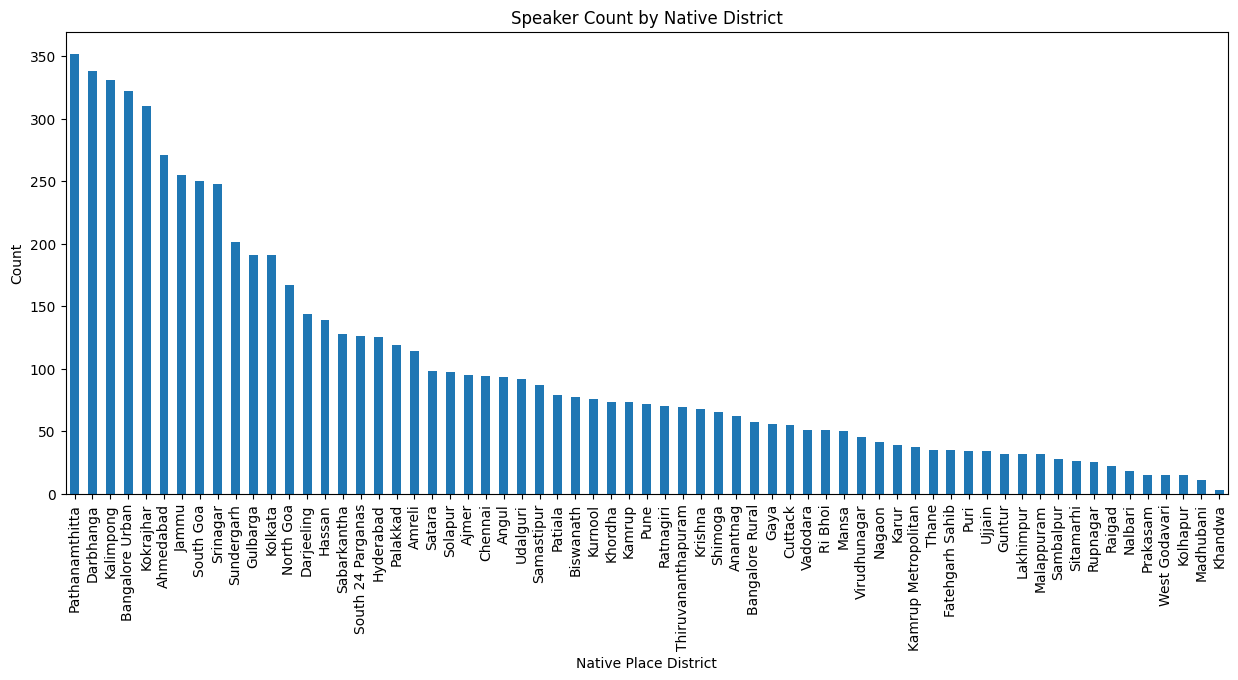

In [144]:
#Speaker Count by Native District
plt.figure(figsize=(15, 6))
df_csv['native_place_district'].value_counts().plot(kind='bar')
plt.title('Speaker Count by Native District')
plt.xlabel('Native Place District')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()